# Project - Index Tracking and Forward Testing

### Importing Data

In [153]:
import pandas as pd

In [154]:
const = pd.read_csv("resources/const_prices.csv", parse_dates=["Date"], index_col="Date")


In [155]:
dji = pd.read_csv("resources/dji.csv", parse_dates=["Date"], index_col="Date")

In [156]:
dji = dji["Close"].to_frame().copy()

In [157]:
df = pd.concat([const, dji], axis=1)

In [158]:
df.rename(columns={"Close":"DJI"}, inplace=True)

In [159]:
more_info  = pd.read_csv("resources/const.csv")

### Tranforming the Data

In [160]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [161]:
norm = df.div(df.iloc[0,:]).mul(100)


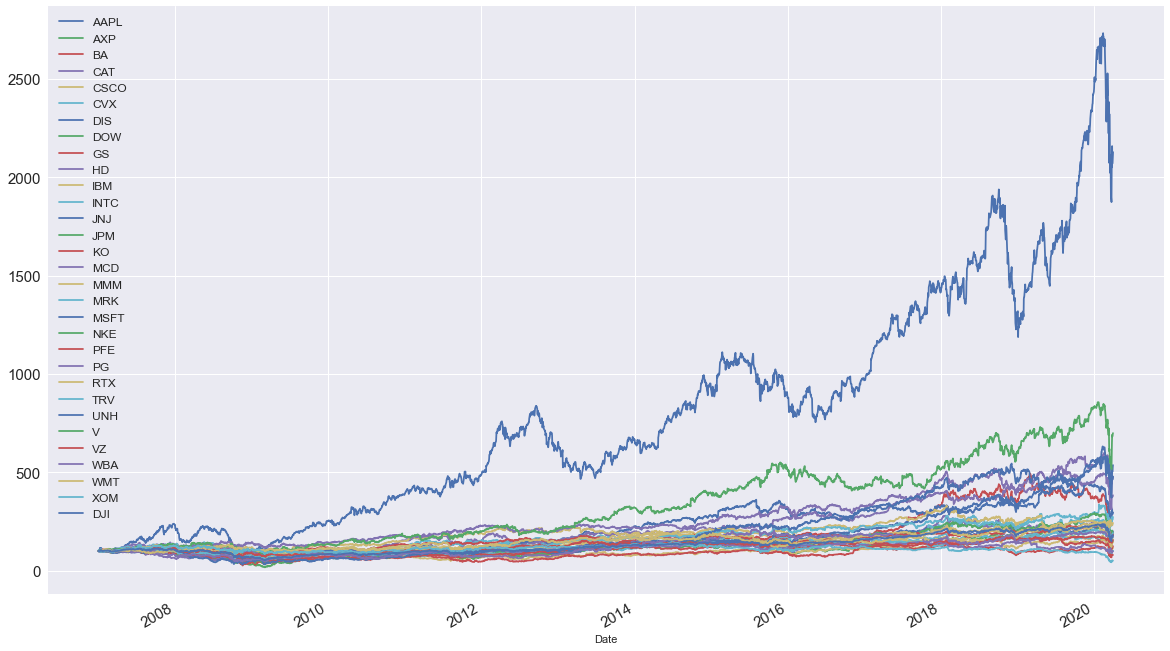

In [162]:
norm.plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

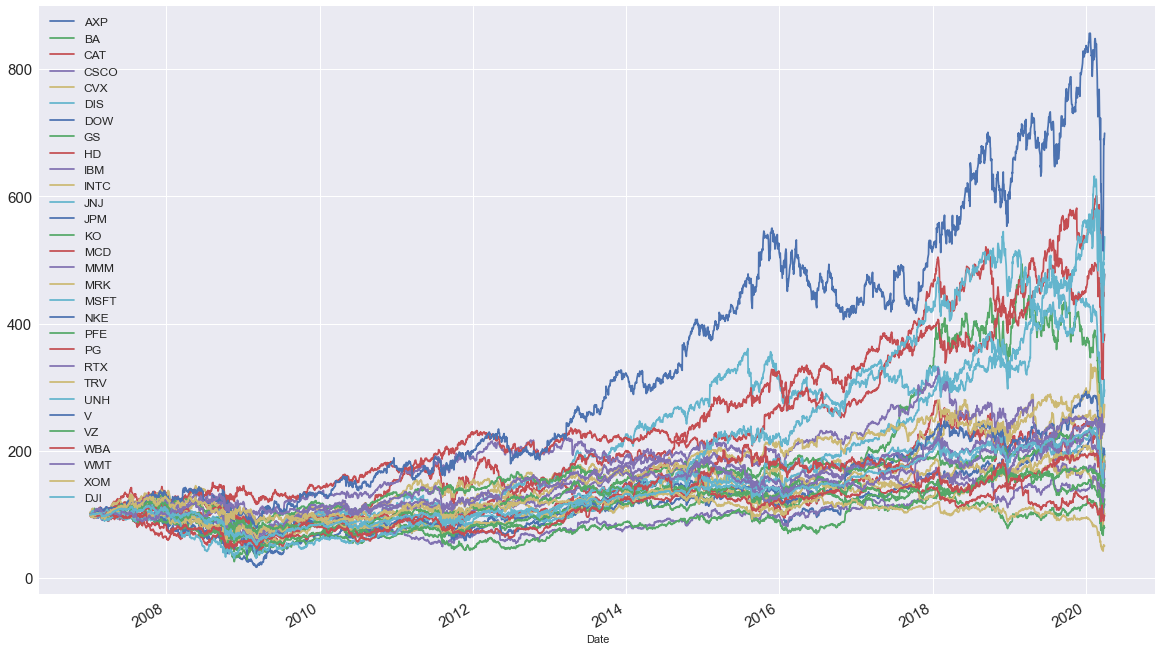

In [163]:
norm.drop(columns=["AAPL"]).plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [164]:
ret = df.pct_change()

In [165]:
ret.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,259.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3029.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.001124,0.000404,0.000375,0.000393,0.000288,0.000172,0.000476,-0.001557,0.000221,0.000618,...,0.000244,0.000263,0.000362,0.000689,0.000996,0.000225,0.000153,0.000349,-0.000077,0.000252
std,0.020285,0.023861,0.020633,0.020599,0.018732,0.018264,0.017384,0.033533,0.024183,0.017243,...,0.011926,0.015987,0.018255,0.021072,0.019155,0.013661,0.017826,0.012961,0.015945,0.012395
min,-0.179195,-0.175949,-0.238484,-0.142822,-0.162107,-0.221248,-0.129846,-0.216577,-0.189596,-0.197938,...,-0.087373,-0.144765,-0.208004,-0.186362,-0.136435,-0.080685,-0.149873,-0.101832,-0.139525,-0.129265
25%,-0.007882,-0.007507,-0.008608,-0.008954,-0.007302,-0.007602,-0.006837,-0.014935,-0.009635,-0.006983,...,-0.004799,-0.006487,-0.006244,-0.008082,-0.007500,-0.006508,-0.008169,-0.005572,-0.007159,-0.003935
50%,0.000985,0.000643,0.000694,0.000392,0.000443,0.000633,0.000572,0.000554,0.000258,0.000528,...,0.000250,0.000508,0.000668,0.000616,0.001224,0.000525,0.000105,0.000540,0.000000,0.000560
75%,0.011166,0.009351,0.009931,0.010251,0.008722,0.008351,0.008090,0.012207,0.010234,0.008160,...,0.005530,0.007680,0.007360,0.009279,0.009248,0.006994,0.008873,0.006329,0.007235,0.005288
max,0.139050,0.218823,0.243186,0.147229,0.159505,0.227407,0.159722,0.209091,0.264678,0.140666,...,0.120090,0.157572,0.255556,0.347550,0.149973,0.146324,0.166355,0.117085,0.171905,0.113650


In [166]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"]*252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean","std"], inplace = True)
    return summary


In [167]:
summary = summary_ann(ret)


In [168]:
summary = summary.merge(more_info.loc[:,["Ticker","Company"]], how="left", left_index=True, right_on="Ticker")

In [169]:
summary.set_index("Company", inplace=True)

In [170]:
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Dow Inc.,-0.392383,0.532319,DOW
Goldman Sachs,0.055702,0.383889,GS


In [171]:
summary.rename(index = {np.nan:"Dow Jones"}, inplace=True)

In [172]:
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Dow Inc.,-0.392383,0.532319,DOW
Goldman Sachs,0.055702,0.383889,GS


### Explanatory Data Analysism

In [173]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     259 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [174]:
summary2 = summary.drop(index="Dow Inc.")

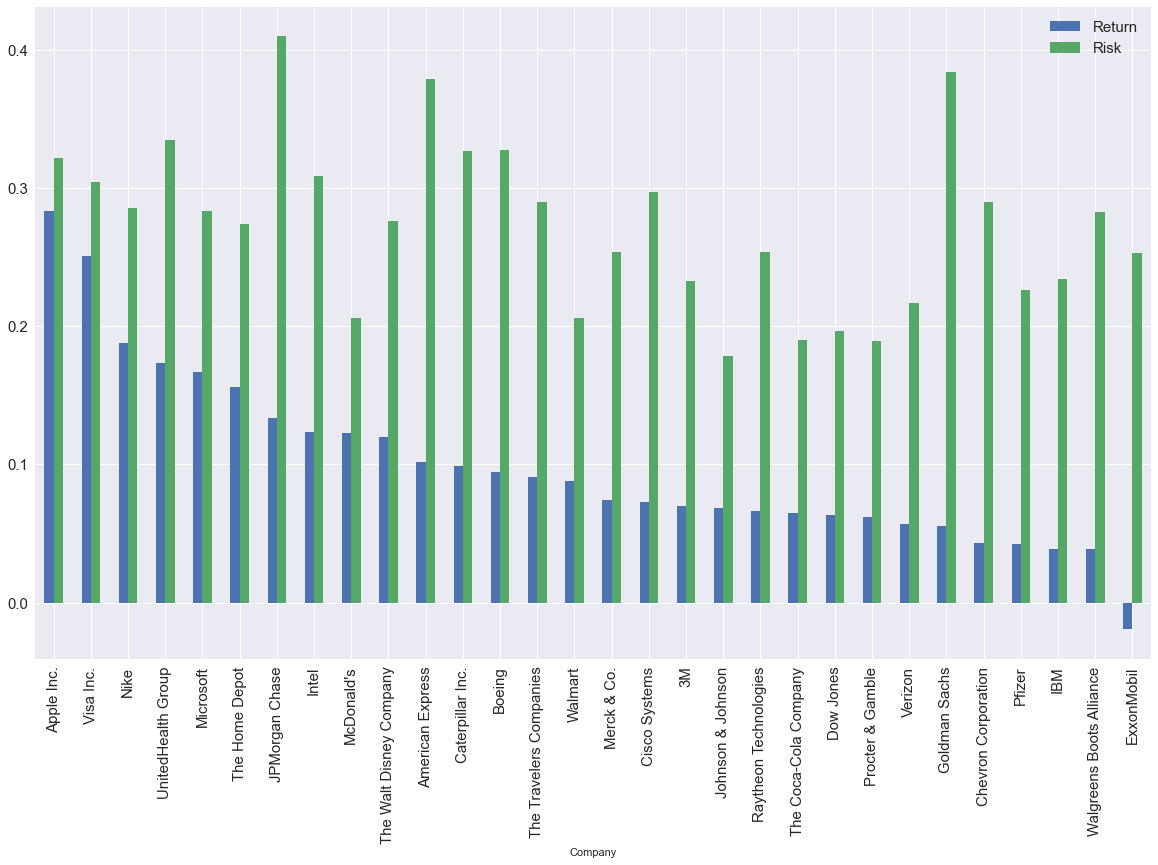

In [175]:
summary2.sort_values(by="Return", ascending=False).plot(kind="bar", figsize=(20,12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

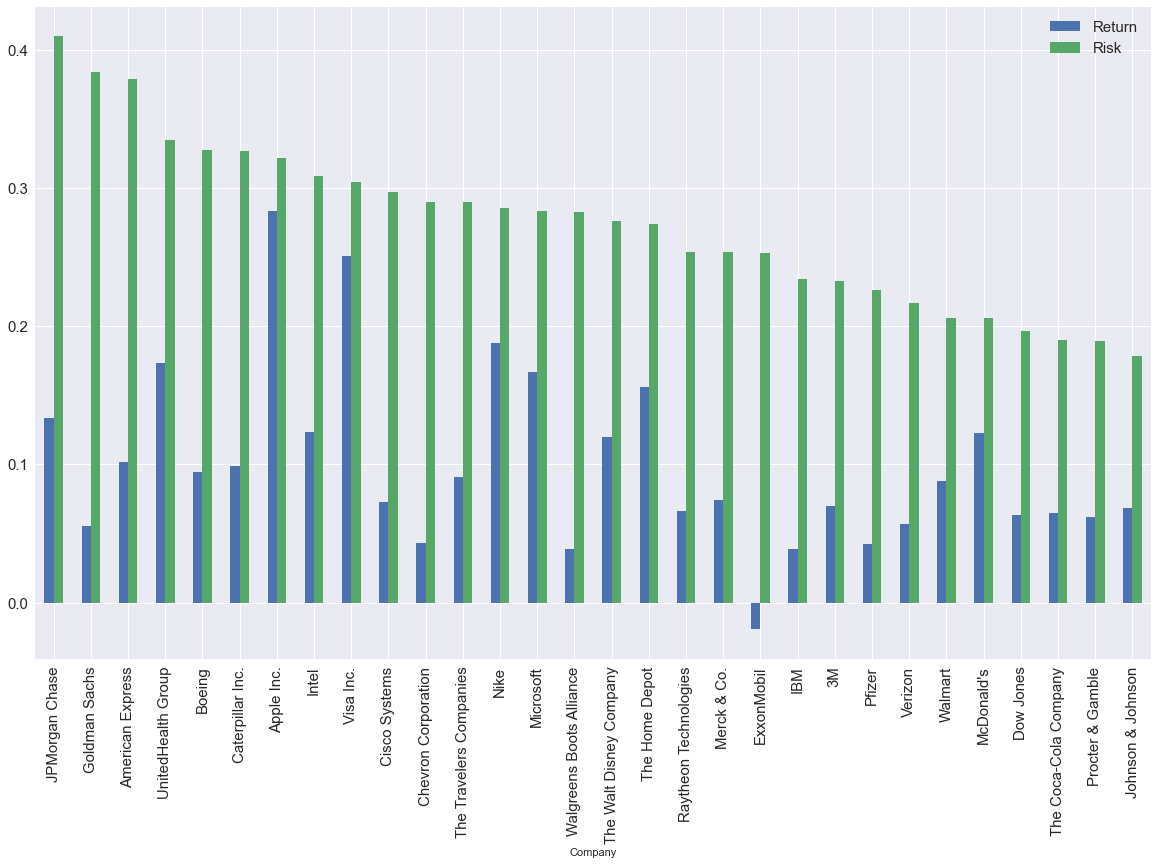

In [176]:
summary2.sort_values(by="Risk", ascending=False).plot(kind="bar", figsize=(20,12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [177]:
summary2.set_index("Ticker", inplace=True)

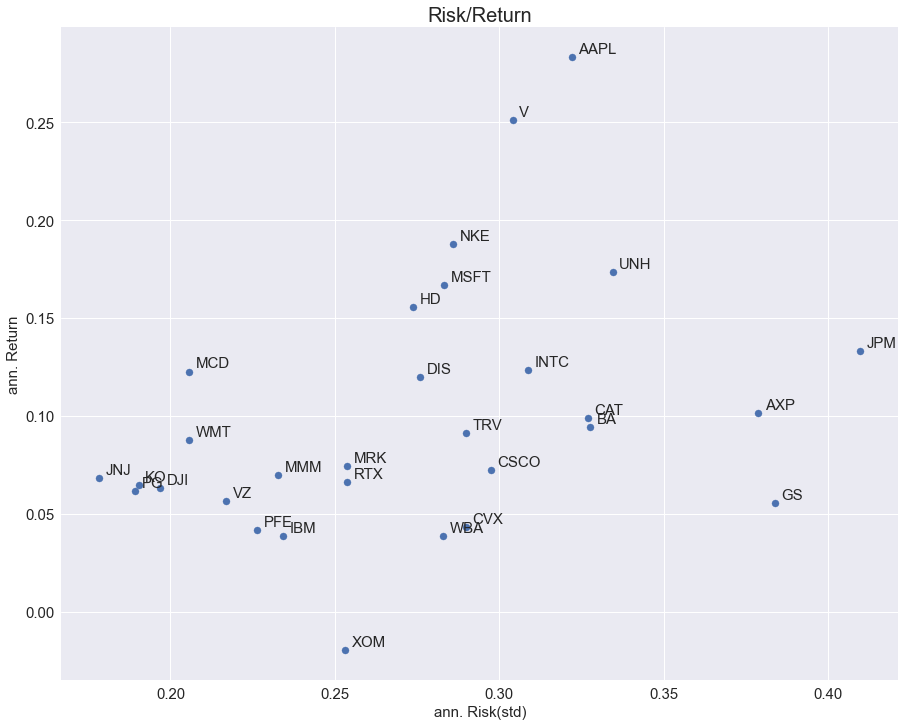

In [178]:
summary2.plot(kind="scatter", x="Risk", y="Return", figsize=(15,12), s=50, fontsize=15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), size=15)
plt.xlabel("ann. Risk(std)", fontsize =15)
plt.ylabel("ann. Return", fontsize=15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [179]:
corr_matrix = ret.corr()
corr_matrix

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
AAPL,1.000000,0.480043,0.438086,0.487226,0.525349,0.449052,0.468580,0.631347,0.476691,0.463329,...,0.363393,0.498010,0.426388,0.390673,0.500869,0.355473,0.358347,0.322451,0.440548,0.621928
AXP,0.480043,1.000000,0.550139,0.595983,0.552228,0.573059,0.627933,0.585071,0.681464,0.602880,...,0.469506,0.632661,0.604635,0.463337,0.608325,0.462106,0.396338,0.372094,0.543933,0.771359
BA,0.438086,0.550139,1.000000,0.553999,0.485747,0.571662,0.566121,0.502373,0.501920,0.527704,...,0.417925,0.680807,0.465494,0.437456,0.470835,0.378064,0.368819,0.331806,0.562232,0.736430
CAT,0.487226,0.595983,0.553999,1.000000,0.568403,0.617253,0.585367,0.759624,0.565734,0.526940,...,0.411556,0.655219,0.473390,0.399110,0.501120,0.433708,0.402600,0.357269,0.617244,0.760203
CSCO,0.525349,0.552228,0.485747,0.568403,1.000000,0.533596,0.583010,0.596760,0.546383,0.531232,...,0.476467,0.587765,0.482416,0.405247,0.510966,0.459482,0.427154,0.416851,0.550696,0.727891
CVX,0.449052,0.573059,0.571662,0.617253,0.533596,1.000000,0.600033,0.541230,0.556975,0.531485,...,0.490095,0.652896,0.570728,0.497396,0.509172,0.475042,0.390131,0.360023,0.850689,0.787176
DIS,0.468580,0.627933,0.566121,0.585367,0.583010,0.600033,1.000000,0.524249,0.584596,0.595523,...,0.530826,0.649854,0.543394,0.475446,0.531920,0.487684,0.442776,0.423168,0.604449,0.781622
DOW,0.631347,0.585071,0.502373,0.759624,0.596760,0.541230,0.524249,1.000000,0.660349,0.568539,...,0.495249,0.589982,0.565861,0.505610,0.613575,0.451777,0.431488,0.489743,0.705081,0.714794
GS,0.476691,0.681464,0.501920,0.565734,0.546383,0.556975,0.584596,0.660349,1.000000,0.566183,...,0.404795,0.572156,0.569984,0.455331,0.553344,0.420014,0.389854,0.349454,0.533439,0.729825
HD,0.463329,0.602880,0.527704,0.526940,0.531232,0.531485,0.595523,0.568539,0.566183,1.000000,...,0.481375,0.603150,0.552381,0.460427,0.535062,0.480420,0.444288,0.490327,0.512038,0.748406


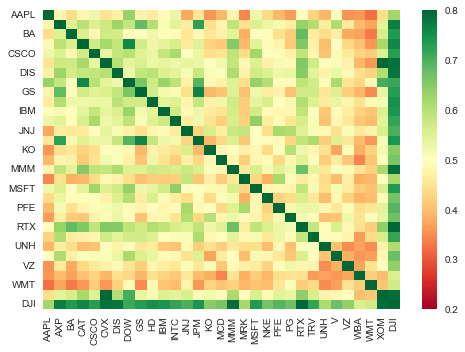

In [180]:
import seaborn as  sns
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=False, vmin=0.2, vmax=0.8)
plt.show()

### Index Tracking - an Introduction

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     260 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [182]:
df2 = df.loc["2017":"2018"].copy()

In [183]:
norm2 = df2.div(df2.iloc[0]).mul(100)


In [184]:
ret2 = ret.loc["2017":"2018"].copy()
ret2

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.002849,0.017144,0.008286,0.013479,0.010589,0.001274,0.017847,NaN,0.008854,0.001715,...,0.001427,0.011038,-0.012416,0.008810,0.018970,0.022480,0.002417,-0.006655,0.006980,0.006030
2017-01-04,-0.001119,0.012077,0.010512,-0.004469,-0.014407,-0.000255,0.012821,NaN,0.006458,0.008860,...,0.003563,0.000632,-0.005376,0.002849,0.008176,-0.001099,0.000241,0.005826,-0.011002,0.003038
2017-01-05,0.005085,-0.012326,0.000567,-0.006092,0.002326,-0.004329,-0.000558,NaN,-0.007445,-0.011808,...,0.006627,0.004058,-0.015967,0.001668,0.011728,0.002201,0.000602,0.002172,-0.014907,-0.002150
2017-01-06,0.011148,0.001992,0.002457,0.000430,0.001989,-0.004006,0.014900,NaN,0.014835,-0.002763,...,-0.000353,0.010777,-0.000507,0.001418,0.013812,-0.025256,0.000843,-0.013726,-0.000565,0.003242
2017-01-09,0.009159,0.005168,-0.004903,-0.007201,-0.001654,-0.008559,-0.005689,NaN,-0.008207,0.005841,...,-0.007409,-0.009329,-0.008032,-0.002832,-0.005595,-0.010890,-0.006618,0.006592,-0.016497,-0.003828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.025874,-0.020037,-0.034116,-0.025985,-0.037515,-0.030899,-0.037133,NaN,-0.023118,-0.014581,...,-0.039683,-0.038802,-0.029554,-0.022657,-0.020361,-0.034050,-0.029735,-0.015035,-0.038315,-0.029100
2018-12-26,0.070422,0.048492,0.067208,0.066781,0.054369,0.063373,0.054609,NaN,0.042085,0.064120,...,0.031250,0.038703,0.040309,0.044690,0.069827,0.026202,0.037695,0.053484,0.047779,0.049846
2018-12-27,-0.006490,0.008951,0.010225,0.015309,0.010360,0.017972,0.006520,NaN,0.015221,0.012123,...,0.021423,-0.002358,0.012802,0.010766,0.013668,0.013042,0.009451,0.013052,0.004371,0.011381


In [185]:
ret_diff = ret2.sub(ret2.DJI, axis=0)
ret_diff

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.011114,0.002257,0.007449,0.004559,-0.004755,0.011817,NaN,0.002824,-0.004314,...,-0.004602,0.005009,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.000950,0.0
2017-01-04,-0.004157,0.009039,0.007474,-0.007507,-0.017445,-0.003293,0.009783,NaN,0.003420,0.005822,...,0.000525,-0.002406,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,-0.014040,0.0
2017-01-05,0.007235,-0.010177,0.002717,-0.003942,0.004475,-0.002179,0.001591,NaN,-0.005295,-0.009658,...,0.008777,0.006207,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,-0.012757,0.0
2017-01-06,0.007906,-0.001250,-0.000785,-0.002812,-0.001253,-0.007248,0.011659,NaN,0.011593,-0.006005,...,-0.003595,0.007535,-0.003749,-0.001824,0.010570,-0.028498,-0.002399,-0.016968,-0.003807,0.0
2017-01-09,0.012987,0.008996,-0.001075,-0.003373,0.002174,-0.004731,-0.001861,NaN,-0.004379,0.009669,...,-0.003581,-0.005501,-0.004205,0.000996,-0.001767,-0.007062,-0.002791,0.010420,-0.012669,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.003226,0.009063,-0.005015,0.003116,-0.008414,-0.001799,-0.008033,NaN,0.005983,0.014519,...,-0.010583,-0.009702,-0.000453,0.006444,0.008740,-0.004949,-0.000635,0.014065,-0.009214,0.0
2018-12-26,0.020576,-0.001354,0.017362,0.016935,0.004524,0.013527,0.004763,NaN,-0.007761,0.014275,...,-0.018596,-0.011143,-0.009537,-0.005156,0.019981,-0.023644,-0.012150,0.003638,-0.002067,0.0
2018-12-27,-0.017870,-0.002429,-0.001155,0.003929,-0.001020,0.006591,-0.004861,NaN,0.003841,0.000742,...,0.010042,-0.013739,0.001421,-0.000614,0.002287,0.001661,-0.001930,0.001671,-0.007010,0.0


In [186]:
ret_diff.agg(["mean","std"]).T

,mean,std
AAPL,0.000362,0.011576
AXP,0.000210,0.008355
BA,0.001214,0.011468
CAT,0.000409,0.012363
CSCO,0.000446,0.009521
CVX,-0.000445,0.009945
DIS,-0.000198,0.009633
DOW,NaN,NaN
GS,-0.000979,0.010002
HD,0.000196,0.008481


### Selecting the Tracking Stocks

In [187]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns=["mean","std"], inplace=True)
    return summary 

In [188]:
tracking = tracking_ann(ret_diff)
tracking

,Premium,TE
AAPL,0.091152,0.183767
AXP,0.053010,0.132638
BA,0.306013,0.182054
CAT,0.103005,0.196256
CSCO,0.112351,0.151141
CVX,-0.112171,0.157867
DIS,-0.049997,0.152914
DOW,NaN,NaN
GS,-0.246714,0.158781
HD,0.049276,0.134628


In [189]:
tracking.sort_values(by=["TE"])

,Premium,TE
DJI,0.000000,0.000000
MMM,-0.041338,0.124822
JPM,-0.011811,0.131067
PFE,0.069015,0.131856
V,0.191612,0.131870
AXP,0.053010,0.132638
RTX,-0.090333,0.133377
KO,-0.017858,0.134622
HD,0.049276,0.134628
XOM,-0.217854,0.136345


In [190]:
noa = 10

In [191]:
tracking_stocks = tracking.sort_values(by="TE").index[:noa+1]

In [192]:
tracking_stocks 

Index(['DJI', 'MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM',
       'TRV'],
      dtype='object')

In [193]:
norm_track = norm2.loc[:, tracking_stocks]
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV
Date,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,100.320130,105.628793,122.878786,153.119501,118.779034,92.086978,109.952153,117.742538,72.076139,93.159633
2018-12-26,115.072556,104.611059,110.008019,127.848481,163.811315,124.538817,95.650995,112.296649,125.292236,75.519859,96.914803
2018-12-27,116.382154,107.104742,111.246128,129.848480,166.050308,125.653619,95.425433,113.708133,126.811116,75.849932,98.155498


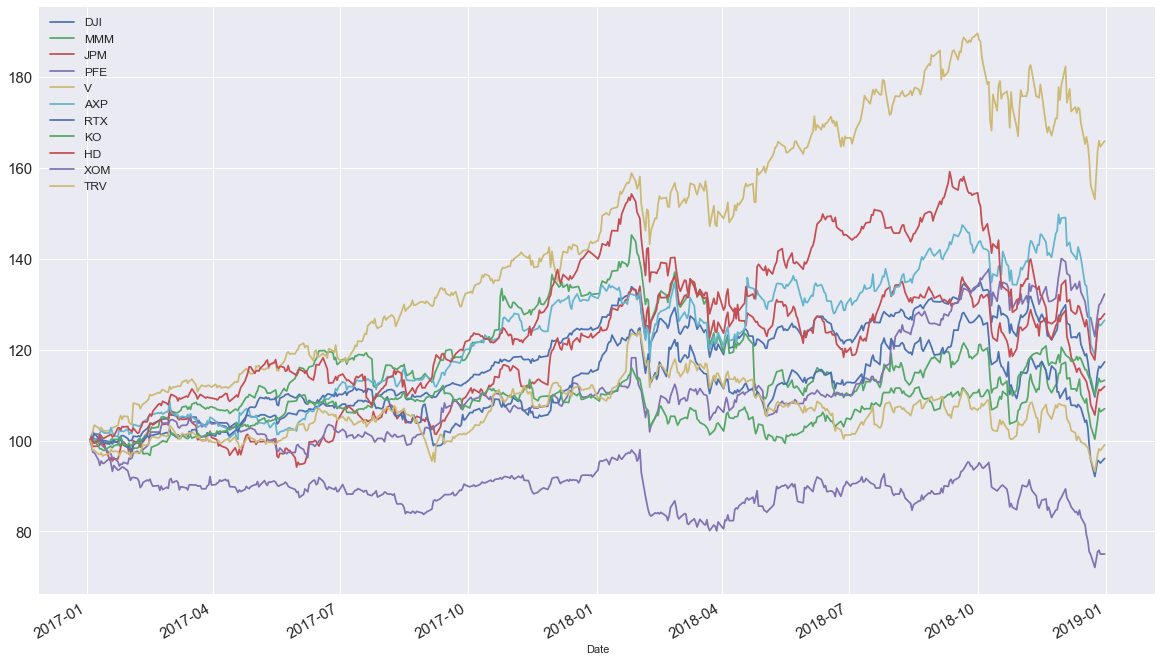

In [194]:
norm_track.plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [195]:
tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

### Index Tracking - A Simple Tracking Portfolio

In [196]:
tracking_stocks

Index(['MMM', 'JPM', 'PFE', 'V', 'AXP', 'RTX', 'KO', 'HD', 'XOM', 'TRV'], dtype='object')

In [197]:
# equal weights (starting point of optimisation)
eweights = np.full(noa, 1/10)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [198]:
ret2.loc[:, tracking_stocks].mean(axis =1)

Date
2017-01-03    0.007562
2017-01-04    0.001641
2017-01-05   -0.003983
2017-01-06    0.002168
2017-01-09   -0.004350
                ...   
2018-12-24   -0.027788
2018-12-26    0.045523
2018-12-27    0.011286
2018-12-28   -0.004372
2018-12-31    0.008403
Length: 502, dtype: float64

In [199]:
ret2.loc[:, tracking_stocks].dot(eweights)

Date
2017-01-03    0.007562
2017-01-04    0.001641
2017-01-05   -0.003983
2017-01-06    0.002168
2017-01-09   -0.004350
                ...   
2018-12-24   -0.027788
2018-12-26    0.045523
2018-12-27    0.011286
2018-12-28   -0.004372
2018-12-31    0.008403
Length: 502, dtype: float64

In [200]:
# Calculate portfolio returns (based on weights)
def port_ref(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [201]:
#define function to be minimised -> minimise tracking error of tracking portfolio
def tracking_error(weights):
    return port_ref(weights).sub(ret2.DJI).std()*np.sqrt(252)

In [202]:
tracking_error(eweights)

0.04120933686266802

In [203]:
ew_port = port_ref(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04    100.164136
2017-01-05     99.765133
2017-01-06     99.981424
2017-01-09     99.546547
2017-01-10     99.482801
                 ...    
2018-12-24    108.298000
2018-12-26    113.228018
2018-12-27    114.505929
2018-12-28    114.005345
2018-12-31    114.963346
Length: 501, dtype: float64

In [204]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277,99.765133
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644,99.981424
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874,99.546547
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,100.320130,105.628793,122.878786,153.119501,118.779034,92.086978,109.952153,117.742538,72.076139,93.159633,108.298000
2018-12-26,115.072556,104.611059,110.008019,127.848481,163.811315,124.538817,95.650995,112.296649,125.292236,75.519859,96.914803,113.228018
2018-12-27,116.382154,107.104742,111.246128,129.848480,166.050308,125.653619,95.425433,113.708133,126.811116,75.849932,98.155498,114.505929


In [205]:
norm_track

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277,99.765133
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644,99.981424
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874,99.546547
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,100.320130,105.628793,122.878786,153.119501,118.779034,92.086978,109.952153,117.742538,72.076139,93.159633,108.298000
2018-12-26,115.072556,104.611059,110.008019,127.848481,163.811315,124.538817,95.650995,112.296649,125.292236,75.519859,96.914803,113.228018
2018-12-27,116.382154,107.104742,111.246128,129.848480,166.050308,125.653619,95.425433,113.708133,126.811116,75.849932,98.155498,114.505929


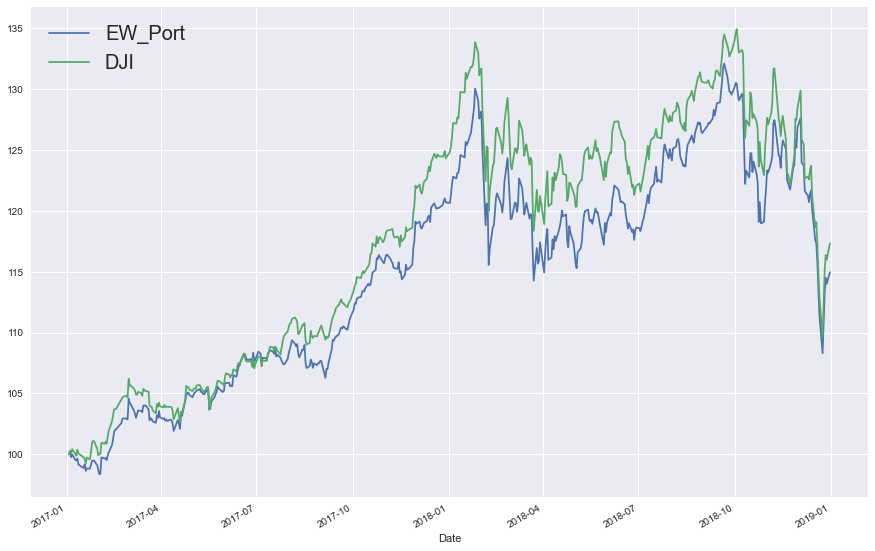

In [206]:
norm_track[["EW_Port", "DJI"]].plot(figsize=(15,10))
plt.legend(fontsize=20, loc=2)
plt.show()

## Index Tracking - The Optimal Tracking Portfolio

In [207]:
import scipy.optimize as sco 

In [208]:
# constraint: weights weights must sum up to 1 -> sum of weights -1 = 0
cons = ({"type":"eq", "fun":lambda x: np.sum(x)-1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [209]:
# bounds: all weights shall be between 0 and 1 -> can be changed
bnds = tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [210]:
# run optimisation based on function to be minimised, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints=cons)

In [211]:
opts

     fun: 0.037961561739846585
     jac: array([0.00744084, 0.00756334, 0.0074499 , 0.0074106 , 0.00737157,
       0.00733688, 0.00725428, 0.00753916, 0.00737198, 0.00768488])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507982])

In [212]:
#output of optimisation 
optimal_weights = opts["x"]
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507982])

In [213]:
optimal_weights = opts["x"]
optimal_weights

array([0.13101952, 0.14451522, 0.05984737, 0.16765083, 0.04028627,
       0.10054676, 0.07688202, 0.10956915, 0.11460304, 0.05507982])

In [214]:
pd.Series(index=tracking_stocks, data=optimal_weights)

MMM    0.131020
JPM    0.144515
PFE    0.059847
V      0.167651
AXP    0.040286
RTX    0.100547
KO     0.076882
HD     0.109569
XOM    0.114603
TRV    0.055080
dtype: float64

In [215]:
opt_port = port_ref(optimal_weights)[1:].add(1).cumprod().mul(100)

In [221]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0,-1] = 100


In [223]:
norm_track.head()

,DJI,MMM,JPM,PFE,V,AXP,RTX,KO,HD,XOM,TRV,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.151645,99.633154,100.878791,100.817612,101.207702,100.063159,99.641154,100.886012,98.899769,99.462364,100.164136,100.125313
2017-01-05,100.088168,99.809044,98.716035,101.848487,101.999995,99.960187,100.469184,99.880385,99.694733,97.425463,97.874277,99.765133,99.822671
2017-01-06,100.412645,100.101091,98.727501,101.454544,103.408804,100.159260,101.551928,99.856465,99.419255,97.370448,97.824644,99.981424,100.145521
2017-01-09,100.028273,99.561922,98.796282,101.424246,102.830189,100.676844,100.604537,98.851676,100.000000,95.764112,97.038874,99.546547,99.669085


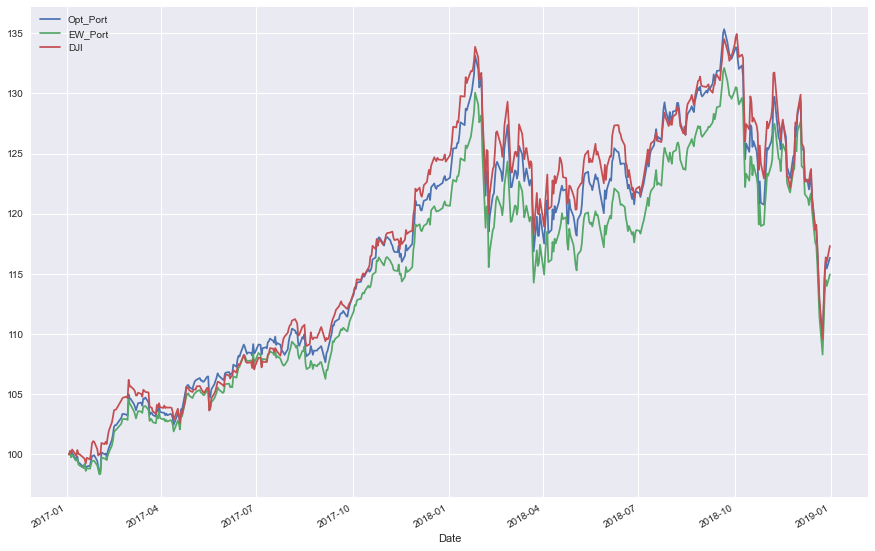

In [226]:
norm_track[["Opt_Port","EW_Port", "DJI"]].plot(figsize=(15,10))
plt.legend(fontsize = 10, loc = 2)
plt.show()

In [225]:
summary_ann(norm_track[["Opt_Port","EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.084879,0.131867
EW_Port,0.078256,0.127138
DJI,0.089562,0.135206


In [228]:
0.135206-0.131867

0.003338999999999981